# BIKES RESALE PRICE PREDICTION
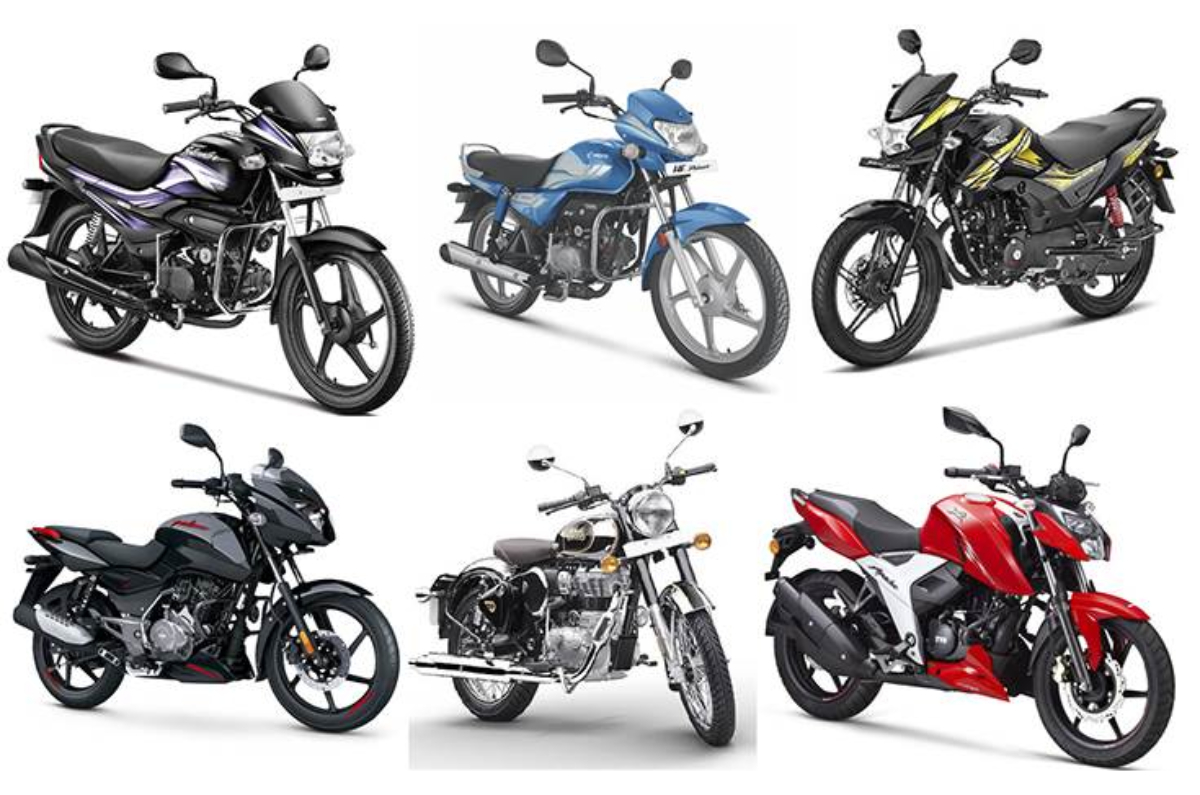

# Import required libraries

In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [27]:
bike=pd.read_csv("Bikes_Resale_Price.csv")
bike

,bike_name,price,city,kms_driven,owner,bike_age,power (cc),brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3.0,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4.0,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,ryrde,First Owner,8.0,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4.0,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3.0,150,Yamaha
...,...,...,...,...,...,...,...,...
32649,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4.0,100,Hero
32650,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9.0,180,TVS
32651,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6.0,220,Bajaj
32652,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16.0,125,Hero


In [28]:
bike.shape

(32654, 8)

In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32654 entries, 0 to 32653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32653 non-null  object 
 1   price       32651 non-null  object 
 2   city        32653 non-null  object 
 3   kms_driven  32652 non-null  object 
 4   owner       32652 non-null  object 
 5   bike_age    32652 non-null  float64
 6   power (cc)  32651 non-null  object 
 7   brand       32651 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.0+ MB


In [30]:
bike['bike_name'].unique()
bike['price'].unique()
bike['city'].unique()
bike['kms_driven'].unique()
bike['owner'].unique()
bike['bike_age'].unique()
bike['power (cc)'].unique()
bike['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       nan, 'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

# Cleaning points

- Bike name has null value.
- Price have null values and non price value.
- City have null values and non city names.
- Kms_driven have null values and non kms_driven values.
- Owner has null values.
- Bike_age have null values.
- Power also have null values and non power value.
- Brand have null values.

# Cleaning

In [31]:
backup=bike.copy()

# Drop null values from the dataset

In [32]:
bike.dropna(axis=0,inplace=True)

In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32649 entries, 0 to 32653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32649 non-null  object 
 1   price       32649 non-null  object 
 2   city        32649 non-null  object 
 3   kms_driven  32649 non-null  object 
 4   owner       32649 non-null  object 
 5   bike_age    32649 non-null  float64
 6   power (cc)  32649 non-null  object 
 7   brand       32649 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.2+ MB


In [34]:
df=bike['bike_name'].str.split(" ").str.slice(0,4)
bike['bike_name']=df.str.join(' ')
bike=bike[bike['bike_name']!='hghd']
bike

,bike_name,price,city,kms_driven,owner,bike_age,power (cc),brand
0,TVS Star City Plus,35000,Ahmedabad,17654,First Owner,3.0,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4.0,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,ryrde,First Owner,8.0,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4.0,180,TVS
4,Yamaha FZ S V,80000,Bangalore,10000,First Owner,3.0,150,Yamaha
...,...,...,...,...,...,...,...,...
32649,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4.0,100,Hero
32650,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9.0,180,TVS
32651,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6.0,220,Bajaj
32652,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16.0,125,Hero


In [35]:
bike=bike[bike['price'].str.isnumeric()]
bike['price']=bike['price'].astype(int)
bike['price']

0         35000
1        119900
2        600000
3         65000
4         80000
          ...  
32648     15000
32649     39000
32650     30000
32651     60000
32652     15600
Name: price, Length: 32646, dtype: int32

In [36]:
bike['city']

0          Ahmedabad
1              Delhi
2              Delhi
3          Bangalore
4          Bangalore
            ...     
32648    Perumbavoor
32649          Delhi
32650         Karnal
32651          Delhi
32652         Jaipur
Name: city, Length: 32646, dtype: object

In [37]:
bike=bike[bike['kms_driven'].str.isnumeric()]
bike

,bike_name,price,city,kms_driven,owner,bike_age,power (cc),brand
0,TVS Star City Plus,35000,Ahmedabad,17654,First Owner,3.0,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4.0,350,Royal Enfield
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4.0,180,TVS
4,Yamaha FZ S V,80000,Bangalore,10000,First Owner,3.0,150,Yamaha
5,Yamaha FZs 150cc,53499,Delhi,25000,First Owner,6.0,150,Yamaha
...,...,...,...,...,...,...,...,...
32648,Hero Passion 100cc,15000,Perumbavoor,35000,Second Owner,19.0,100,Hero
32649,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4.0,100,Hero
32650,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9.0,180,TVS
32651,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6.0,220,Bajaj


In [38]:
bike['kms_driven']=bike['kms_driven'].astype(int)
bike['kms_driven']

0        17654
1        11000
3        16329
4        10000
5        25000
         ...  
32648    35000
32649    22000
32650     6639
32651    20373
32652    84186
Name: kms_driven, Length: 32643, dtype: int32

In [39]:
bike=bike[bike['power (cc)'].str.isnumeric()]
bike

,bike_name,price,city,kms_driven,owner,bike_age,power (cc),brand
0,TVS Star City Plus,35000,Ahmedabad,17654,First Owner,3.0,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4.0,350,Royal Enfield
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4.0,180,TVS
4,Yamaha FZ S V,80000,Bangalore,10000,First Owner,3.0,150,Yamaha
5,Yamaha FZs 150cc,53499,Delhi,25000,First Owner,6.0,150,Yamaha
...,...,...,...,...,...,...,...,...
32648,Hero Passion 100cc,15000,Perumbavoor,35000,Second Owner,19.0,100,Hero
32649,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4.0,100,Hero
32650,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9.0,180,TVS
32651,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6.0,220,Bajaj


In [40]:
bike['power (cc)']=bike['power (cc)'].astype(int)
bike['power (cc)']

0        110
1        350
3        180
4        150
5        150
        ... 
32648    100
32649    100
32650    180
32651    220
32652    125
Name: power (cc), Length: 32640, dtype: int32

# Now data is cleaned. 

In [41]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32640 entries, 0 to 32652
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32640 non-null  object 
 1   price       32640 non-null  int32  
 2   city        32640 non-null  object 
 3   kms_driven  32640 non-null  int32  
 4   owner       32640 non-null  object 
 5   bike_age    32640 non-null  float64
 6   power (cc)  32640 non-null  int32  
 7   brand       32640 non-null  object 
dtypes: float64(1), int32(3), object(4)
memory usage: 1.9+ MB


In [42]:
bike=bike.reset_index(drop=True)
bike

,bike_name,price,city,kms_driven,owner,bike_age,power (cc),brand
0,TVS Star City Plus,35000,Ahmedabad,17654,First Owner,3.0,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4.0,350,Royal Enfield
2,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4.0,180,TVS
3,Yamaha FZ S V,80000,Bangalore,10000,First Owner,3.0,150,Yamaha
4,Yamaha FZs 150cc,53499,Delhi,25000,First Owner,6.0,150,Yamaha
...,...,...,...,...,...,...,...,...
32635,Hero Passion 100cc,15000,Perumbavoor,35000,Second Owner,19.0,100,Hero
32636,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4.0,100,Hero
32637,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9.0,180,TVS
32638,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6.0,220,Bajaj


In [43]:
bike.describe()

,price,kms_driven,bike_age,power (cc)
count,3.264000e+04,32640.000000,32640.000000,32640.000000
mean,6.828010e+04,26345.043627,8.048407,213.493627
std,9.067971e+04,22207.816065,4.031827,134.410393
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [44]:
# bike.to_csv('Cleaned bike resale_data.csv')

# Data have so many outliers that affect the prediction.

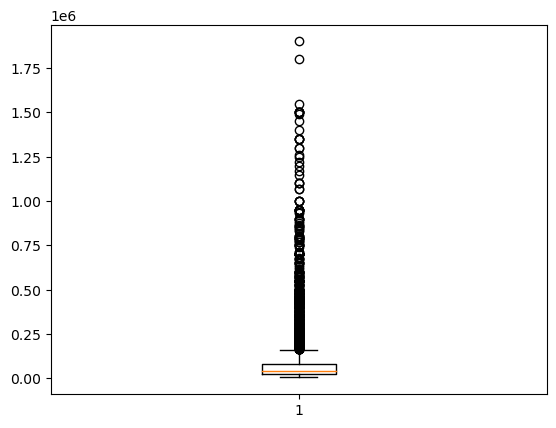

In [45]:
import matplotlib.pyplot as plt

plt.boxplot(bike['price'])
plt.show()

# Now remove the Outliers.

In [46]:
bike=bike[bike['price']<=90000]

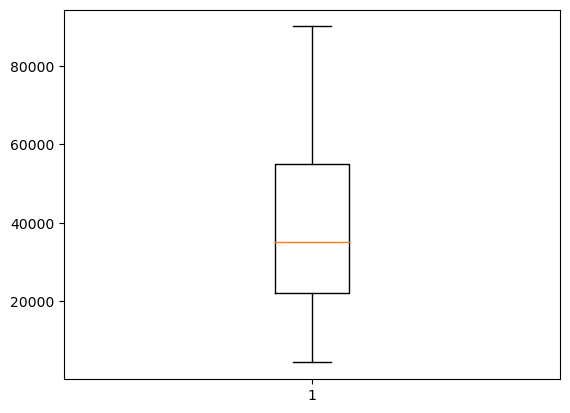

In [47]:
plt.boxplot(bike['price'])
plt.show()

In [48]:
bike.reset_index(drop=True)

,bike_name,price,city,kms_driven,owner,bike_age,power (cc),brand
0,TVS Star City Plus,35000,Ahmedabad,17654,First Owner,3.0,110,TVS
1,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4.0,180,TVS
2,Yamaha FZ S V,80000,Bangalore,10000,First Owner,3.0,150,Yamaha
3,Yamaha FZs 150cc,53499,Delhi,25000,First Owner,6.0,150,Yamaha
4,Honda CB Hornet 160R,85000,Delhi,8200,First Owner,3.0,160,Honda
...,...,...,...,...,...,...,...,...
26313,Hero Passion 100cc,15000,Perumbavoor,35000,Second Owner,19.0,100,Hero
26314,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4.0,100,Hero
26315,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9.0,180,TVS
26316,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6.0,220,Bajaj


# Model

In [49]:
x=bike.drop(columns='price')
y=bike['price']

# Import Machine learning libraries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [51]:
ohe=OneHotEncoder()
ohe.fit(x[['bike_name','city','owner','brand']])

OneHotEncoder()

In [52]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                     ['bike_name','city','owner','brand']),
                                    remainder='passthrough')

# To take out maximum r2 score

In [31]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [33]:
np.argmax(scores)  

244

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=244)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.941278907985263

In [32]:
pipe.predict(pd.DataFrame([['TVS Star City Plus','Ahmedabad',17654,
                            'First Owner',3,
                           110,'TVS']],columns=['bike_name','city','kms_driven',
                                                 'owner','bike_age','power (cc)','brand']))

# Now convert model into web application 

In [33]:
bike['bike_name'].unique()

array(['TVS Star City Plus', 'TVS Apache RTR 180cc', 'Yamaha FZ S V',
       'Yamaha FZs 150cc', 'Honda CB Hornet 160R',
       'Hero Splendor Plus Self', 'Royal Enfield Classic Desert',
       'Yamaha YZF-R15 2.0 150cc', 'Bajaj Pulsar NS200',
       'Bajaj Discover 100M', 'Bajaj Discover 125M',
       'Bajaj Pulsar NS200 ABS', 'Suzuki Gixxer SF 150cc',
       'Hero Splendor iSmart Plus', 'Yamaha FZ V 2.0',
       'Hero Super Splendor 125cc', 'Honda CBF Stunner 125cc',
       'Bajaj Pulsar 150cc', 'Honda X-Blade 160CC ABS',
       'Bajaj Avenger 220cc', 'Honda CB Unicorn 150cc', 'KTM Duke 200cc',
       'Honda CBR 150R 150cc', 'Royal Enfield Thunderbird 350cc',
       'Royal Enfield Bullet Electra', 'Royal Enfield Classic 350cc',
       'Mahindra Centuro NXT 110cc', 'Hero Hunk 150cc', 'Yamaha FZ 150cc',
       'Royal Enfield\u200e Bullet 350cc', 'TVS Apache RTR 160cc',
       'Honda CB Shine 125cc', 'Honda Dream Yuga 110cc',
       'Yamaha SZ 150cc', 'Suzuki Gixxer 150cc',
       'Baja

In [34]:
bike['city'].unique()

array(['Ahmedabad', 'Bangalore', 'Delhi', 'Mumbai', 'Faridabad', 'Mettur',
       'Hyderabad', 'Kaithal', 'Gurgaon', 'Noida', 'Nashik', 'Allahabad',
       'Nadiad', 'Lucknow', 'Jaipur', 'Karnal', 'Gorakhpur', 'Vidisha',
       'Hosur', 'Agra', 'Vadodara', 'Jalandhar', 'Surat', 'Chennai',
       'Pune', 'Visakhapatnam', 'Thrissur', 'Ernakulam', 'Barasat',
       'Kolkata', 'Bhubaneshwar', 'Bagalkot', 'Bhopal', 'Arrah',
       'Patiala', 'Ranga Reddy', 'Mandi', 'Ludhiana', 'Siliguri',
       'Aurangabad', 'Meerut', 'Rewari', 'Ahmednagar', 'Wardha',
       'Chandigarh', 'Thane', 'Jabalpur', 'Rohtak', 'Rajkot', 'Varanasi',
       'Kanpur', '24 Pargana', 'Kota', 'Banka', 'Banki', 'Pali',
       'Chhatarpur', 'Katihar', 'Rudrapur', 'Mysore', 'Bikaner', 'Malout',
       'Unnao', 'Godhara', 'Ghaziabad', 'Ranchi', 'Satara', 'Siwan',
       'Bhiwani', 'Nizamabad', 'Ujjain', 'Coimbatore', 'Palakkad',
       'Tiruvallur', 'Panchkula', 'Nanjangud', 'Jhansi', 'Sonipat',
       'Puttur', 'Hoshiarpur

In [35]:
bike['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [36]:
bike['brand'].unique()

array(['TVS', 'Yamaha', 'Honda', 'Hero', 'Royal Enfield', 'Bajaj',
       'Suzuki', 'KTM', 'Mahindra', 'Rajdoot', 'LML', 'Yezdi'],
      dtype=object)

In [36]:
import pickle

pickle.dump(pipe,open('bike_pipe_.pkl','wb'))